In [2]:
import torch
import torch.nn as nn
import os
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch.utils.data import Dataset,DataLoader,TensorDataset,random_split
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import models 

In [3]:
img_transforms = transforms.Compose([transforms.Resize([224,224]), # Resizing the image as the VGG only take 224 x 244 as input size
                                    transforms.RandomHorizontalFlip(), # Flip the data horizontally
                                    #TODO if it is needed, add the random crop
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))])

In [4]:
dirs="/content/drive/MyDrive/dataset/Multi-class Weather Dataset/"

In [5]:
i=0
df = pd.DataFrame()
for folder in os.listdir(dirs):
  path = os.path.join(dirs,folder)
  for img in os.listdir(path):
    if ".jpg" in img:
      full_path = os.path.join(path,img)
      df.loc[i,"image"] = full_path
      df.loc[i,"label"] = folder
      i+=1

In [6]:
df.head()

,image,label
0,/content/drive/MyDrive/dataset/Multi-class Wea...,Shine
1,/content/drive/MyDrive/dataset/Multi-class Wea...,Shine
2,/content/drive/MyDrive/dataset/Multi-class Wea...,Shine
3,/content/drive/MyDrive/dataset/Multi-class Wea...,Shine
4,/content/drive/MyDrive/dataset/Multi-class Wea...,Shine


In [7]:
df.image[0]

'/content/drive/MyDrive/dataset/Multi-class Weather Dataset/Shine/shine17.jpg'

In [8]:
mapping_cls = {idx:val for val,idx in enumerate(np.unique(df["label"]))}
mapping_cls

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}

In [9]:
df["label"] = df["label"].map(mapping_cls)

In [10]:
pic = df.image[0]
img = Image.open(pic).convert("RGB")
t= img_transforms(img)
t.shape

torch.Size([3, 224, 224])

In [11]:
df.head()

,image,label
0,/content/drive/MyDrive/dataset/Multi-class Wea...,2
1,/content/drive/MyDrive/dataset/Multi-class Wea...,2
2,/content/drive/MyDrive/dataset/Multi-class Wea...,2
3,/content/drive/MyDrive/dataset/Multi-class Wea...,2
4,/content/drive/MyDrive/dataset/Multi-class Wea...,2


In [12]:
class Datasets(Dataset):
  def __init__(self,X,y,transform=img_transforms):
    self.X = X
    self.y = y
    self.transform = transform

  def __len__(self):
    return len(self.X)

  def __getitem__(self,index):
    img = Image.open(self.X[index]).convert("RGB")
    transform = self.transform(img)
    return (torch.tensor(transform,dtype=torch.float),torch.tensor(self.y[index],dtype=torch.long))

In [13]:
dataset = Datasets(df.image,df.label)

In [14]:
len(dataset)

1122

In [15]:
train_size = int(0.8*len(dataset))
test_size = int(len(dataset) - train_size)
train_size,test_size,train_size+test_size

(897, 225, 1122)

In [16]:
train_data,test_data = random_split(dataset,[train_size,test_size])

In [17]:
train_loader = DataLoader(train_data,batch_size=12,shuffle=True)

In [18]:
test_loader = DataLoader(test_data,batch_size=12,shuffle=False)

In [19]:
# class Module(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.conv1=nn.Conv2d(3,16,5)
#     self.batchNorm1 = nn.BatchNorm2d(16)
#     self.conv2=nn.Conv2d(16,32,5)
#     self.batchNorm2 = nn.BatchNorm2d(32)
#     self.conv3=nn.Conv2d(32,64,3)
#     self.batchNorm3 = nn.BatchNorm2d(64)
#     self.conv4=nn.Conv2d(64,128,5)
#     self.batchNorm4 = nn.BatchNorm2d(128)
#     self.pool=nn.MaxPool2d(2,2)
#     self.dropout=nn.Dropout(p=0.3)
#     self.linear1=nn.Linear(128,256)
#     self.linear2=nn.Linear(256,len(mapping_cls))
#     # self.softmax=nn.Softmax(dim=1)
#     # self.sigmoid=nn.Sigmoid()

#   def forward(self,x):
#     x=self.pool(F.relu(self.conv1(x)))
#     x=self.batchNorm1(x)
#     x=self.pool(F.relu(self.conv2(x)))
#     x=self.batchNorm2(x)
#     x=self.pool(F.relu(self.conv3(x)))
#     x=self.batchNorm3(x)
#     x=self.pool(F.relu(self.conv4(x)))
#     x=self.batchNorm4(x)
#     bs,_,_,_=x.shape
#     x=F.adaptive_avg_pool2d(x,1).reshape(bs,-1)
#     x=self.dropout(x)
#     x=F.relu(self.linear1(x))
#     x=self.linear2(x)
#     # x = F.softmax(dim=1)
#     # return F.softmax(x)
#     return torch.sigmoid(x)

In [20]:
# model = Module()


In [21]:
model=models.resnet50(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
model.fc=nn.Sequential(nn.Linear(2048,512),
                       nn.ReLU(),
                       nn.Dropout(0.2),
                       nn.Linear(512,len(mapping_cls)),
                       nn.LogSoftmax(dim=1))

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [24]:
def fit(model,train_loader):
  model.train()
  train_running_loss=0
  train_running_correct=0
  for i,data in enumerate(train_loader):
    data,target=data[0],data[1]
    optimizer.zero_grad()
    outputs=model(data)
    loss=criterion(outputs,target)
    train_running_loss+=loss.item()
    _,preds=torch.max(outputs.data,1)
    train_running_correct+=(preds == target).sum().item()
    loss.backward()
    optimizer.step()

  train_loss=train_running_loss / len(train_loader.dataset)
  train_accuracy=100*train_running_correct / len(train_loader.dataset)

  print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}")

  return train_loss,train_accuracy

In [25]:
def validate(model, test_dataloader):
    print('Validating')
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    with torch.no_grad():
      for i, data in enumerate(test_dataloader):
        data, target = data[0], data[1]
        outputs=model(data)
        loss = criterion(outputs, target)
        val_running_loss += loss.item()
        _, preds = torch.max(outputs.data, 1)
        val_running_correct += (preds == target).sum().item()
        
      val_loss = val_running_loss/len(test_dataloader.dataset)
      val_accuracy = 100. * val_running_correct/len(test_dataloader.dataset)
      print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.2f}')

        
        
      return val_loss, val_accuracy

In [26]:
import time

In [27]:
train_loss,train_accuracy=[],[]
val_loss,val_accuracy=[],[]
start=time.time()
for epoch in range(3):
  print(f"Epoch {epoch+1}")
  train_epoch_loss,train_epoch_accuracy=fit(model,train_loader)
  test_epoch_loss,test_epoch_accuracy=validate(model,test_loader)
  train_loss.append(train_epoch_loss)
  train_accuracy.append(train_epoch_accuracy)
  val_loss.append(test_epoch_loss)
  val_accuracy.append(test_epoch_accuracy)
  # torch.save(model.state_dict(),Dir2+"images_data.pt")

end = time.time()
print(f"{(end-start)/60:.3f} minutes")

Epoch 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


Train Loss: 0.2320, Train Acc: 31.44
Validating
Val Loss: 0.1374, Val Acc: 31.56
Epoch 2
Train Loss: 0.0949, Train Acc: 49.28
Validating
Val Loss: 0.0759, Val Acc: 65.33
Epoch 3
Train Loss: 0.0781, Train Acc: 59.98
Validating
Val Loss: 0.0680, Val Acc: 60.89
44.013 minutes


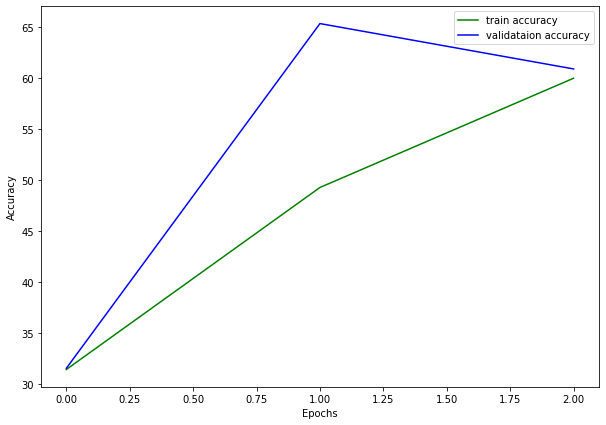

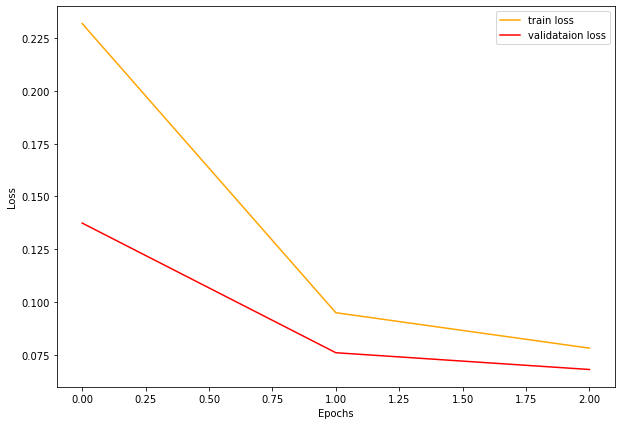

TRAINING COMPLETE


In [28]:
# accuracy plots
plt.figure(figsize=(10, 7))
plt.plot(train_accuracy, color='green', label='train accuracy')
plt.plot(val_accuracy, color='blue', label='validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig(Dir2+'accuracy.png')
plt.show()
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(train_loss, color='orange', label='train loss')
plt.plot(val_loss, color='red', label='validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig(Dir2+'loss.png')
plt.show()
    
# serialize the model to disk
# print('Saving model...')
# torch.save(model.state_dict(), args['model'])
 
print('TRAINING COMPLETE')

In [29]:
from torch.autograd import Variable

In [30]:
weather1 = "/content/drive/MyDrive/dataset/Prediction_data/weather.jpeg"
weather2 = "/content/drive/MyDrive/dataset/Prediction_data/weather2.jpeg"

In [37]:
imsize = 224
loader = transforms.Compose([transforms.Resize((imsize,imsize)), transforms.ToTensor()])



def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image  #assumes that you're using GPU


image = image_loader(df.image[0])
model(image)

tensor([[-2.1604, -2.7191, -0.2137, -4.4904]], grad_fn=<LogSoftmaxBackward0>)

In [36]:
imsize = 224
loader = transforms.Compose([transforms.Resize((imsize,imsize)), transforms.ToTensor()])



def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image  #assumes that you're using GPU


image = image_loader(weather1)
model(image)

tensor([[-2.1294, -2.6768, -0.2227, -4.4270]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
mapping_cls

{'Cloudy': 0, 'Rain': 1, 'Shine': 2, 'Sunrise': 3}

In [33]:
imsize = 224
loader = transforms.Compose([transforms.Resize((imsize,imsize)), transforms.ToTensor()])



def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image  #assumes that you're using GPU


image = image_loader(weather2)
model(image)

tensor([[-2.2024, -2.7633, -0.2030, -4.5935]], grad_fn=<LogSoftmaxBackward0>)

In [34]:
rain = "/content/drive/MyDrive/dataset/Multi-class Weather Dataset/Rain/rain14.jpg"

In [35]:
imsize = 224
loader = transforms.Compose([transforms.Resize(imsize), transforms.ToTensor()])



def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image  #assumes that you're using GPU


image = image_loader(rain)
model(image)

tensor([[-2.1504, -2.7047, -0.2166, -4.4735]], grad_fn=<LogSoftmaxBackward0>)